In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap

## Wine data

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## data scale 차이가 심하여 정규화를 하고 시작

### Magnisum과 Proline과 다른 feature간의 scale격차가 굉장히 심함 => 정규화필요

In [3]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(wine.data)
wine_scaled_data = std_scaler.transform(wine.data)
wine_scaled_data
wine_scaled_data.mean()

4.66735072755122e-16

# Split data

In [4]:
from sklearn.model_selection import train_test_split
# 80 : 20으로 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(wine_scaled_data, wine.target, test_size = 0.2,random_state=95)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state=95)

In [5]:
# 80 : 10 : 10 비율로 잘 나눠졌는지 데이터 크기 관찰

print("x_train 의 크기 : {}".format(x_train.shape))
print("y_train 의 크기 : {}".format(y_train.shape))
print("x_test 의 크기 : {}".format(x_test.shape))
print("y_test 의 크기 : {}".format(y_test.shape))
print("x_valid 의 크기 : {}".format(x_valid.shape))
print("y_valid 의 크기 : {}".format(y_valid.shape))

x_train 의 크기 : (142, 13)
y_train 의 크기 : (142,)
x_test 의 크기 : (18, 13)
y_test 의 크기 : (18,)
x_valid 의 크기 : (18, 13)
y_valid 의 크기 : (18,)


# KNN Classifier

### Requirements : 수업시간에 배운 metric 들 중 최소 두 개 비교 ,이웃의 개수 k 를 최소 3개 비교

### 1) 최적의 hyper parameter 도출

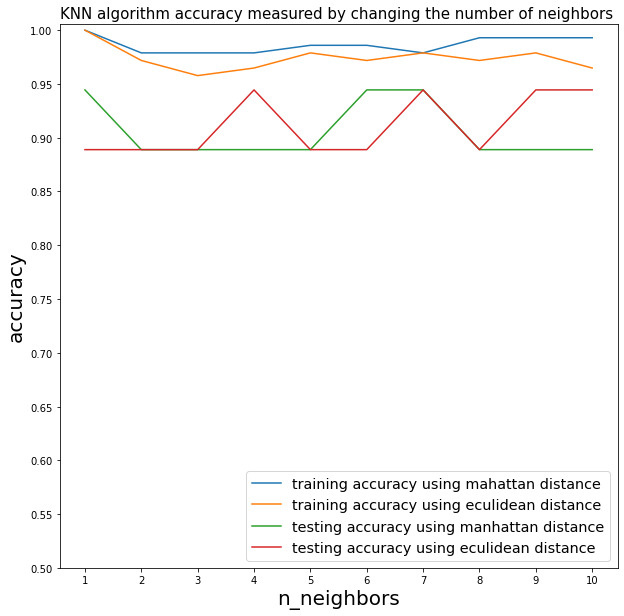

In [6]:
# graph setting
import numpy as np
plt.figure(figsize=(10.0,10.0))
# title
plt.title('KNN algorithm accuracy measured by changing the number of neighbors ',fontsize='15')
# plt의 x 축
plt.xlabel('n_neighbors',fontsize='20')
# plt의 y 축
plt.ylabel('accuracy',fontsize='20')

# KNN algorithm을 사용하여 성능평가를 위한 함수 작성
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## grid_search를 극소적으로 구현

## test accuracy 측정
def test_estimator(train_data, train_label, test_data, test_label, metric, legend):
    score=[] # 점수를 담아둘 리스트
    for k in range(1,11): # neighbor size 1 ~ 20
        # training phase
            # none
        # testing phase
        knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,p=metric)
        knn.fit(train_data,train_label)
        y_pred = knn.predict(test_data)
        # 각각의 결과에 대한 점수를 리스트에 추가
        score.append(accuracy_score(test_label,y_pred))
    # 점수를 그래프로 시각화 EDA
    plt.plot([i for i in range(1,11)],score,label=legend)
    # 점수리스트 초기화
    score=[]

## training accuracy 측정
def training_estimator(train_data, train_label,metric,legend):
    score=[]
    for k in range(1,11):
        knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1,p=metric)
        knn.fit(train_data,train_label)
        y_pred = knn.predict(train_data)
        score.append(accuracy_score(train_label,y_pred))
    plt.plot([i for i in range(1,11)],score,label=legend)
    score=[]
# training 데이터로 training accuracy 측정 - 맨하탄 거리
training_estimator(x_train,y_train,1,'training accuracy using mahattan distance')
# training 데이터로 training accuracy 측정- 유클리드 거리
training_estimator(x_train,y_train,2,'training accuracy using eculidean distance')
# valid 데이터로 testing accuracy 측정 - 맨하탄 거리
test_estimator(x_train,y_train,x_valid,y_valid,1, 'testing accuracy using manhattan distance')
# valid 데이터로 testing accuracy 측정 - 유클리드 거리
test_estimator(x_train,y_train,x_valid,y_valid,2, 'testing accuracy using eculidean distance')
# graph setting
plt.legend(loc='lower right',fontsize='x-large')
x_bins = np.arange(1,11,step=1)
plt.xticks(x_bins)
y_bins = np.arange(0.5,1.05,step=0.05)
plt.yticks(y_bins)
plt.show()

### 결과 : k가 9일때, metric은 euclidean distance 인 경우 결과가 가장 좋았다.

### 2) 최종 성능 평가

In [7]:
# valid와 training으로 나눠져있던 데이터를 최종 성능 검증을 위한 training set으로 합친다.
import numpy as np
x_train = np.concatenate((x_train, x_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)
# 잘합쳐졌는지 확인
# 178개의 instance 9: 1 분할 이므로 178 * 0.9 = 160개의 데이터
print("x_train 의 크기 : {}".format(x_train.shape))
print("y_train 의 크기 : {}".format(y_train.shape))

x_train 의 크기 : (160, 13)
y_train 의 크기 : (160,)


In [8]:
knn = KNeighborsClassifier(n_neighbors=4, p=2)
knn.fit(x_train,y_train)
knn_score = knn.score(x_test,y_test)
print("KNN의 최종 accuracy는 %.2f %%입니다."%(knn_score*100))

KNN의 최종 accuracy는 94.44 %입니다.


# [Decision Tree Classifier]

## Requirements : gini 와 entropy criterion의 비교

<strong> 수업시간에 중요하게 다뤘던 hyper parameter인 max_depth를 추가하여 비교 </strong>

### 1)최적의 hyper parameter 도출

In [31]:
from sklearn.model_selection import train_test_split
# 80 : 20으로 데이터 분할
x_train, x_test, y_train, y_test, x_valid, y_valid =0, 0, 0, 0, 0, 0
x_train, x_test, y_train, y_test = train_test_split(wine_scaled_data, wine.target, test_size = 0.2,random_state=95)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state=95)

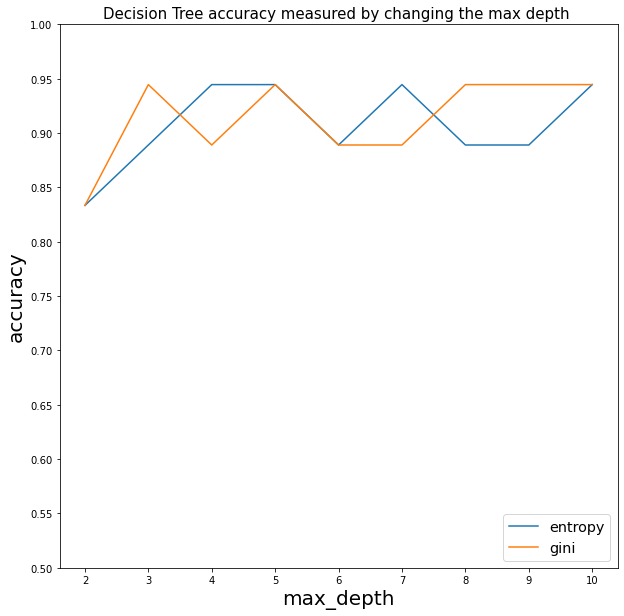

In [32]:
from sklearn import tree
# graph setting
plt.figure(figsize=(10.0,10.0))
plt.title('Decision Tree accuracy measured by changing the max depth ',fontsize='15')
plt.xlabel('max_depth',fontsize='20')
plt.ylabel('accuracy',fontsize='20')

# 각 hyper parameter에서 나타나는 정확도를 성능지표로 삼기위해 리스트 생성
score = []
# criterion='entropy' 이면서 max_depth를 바꿔가며 정확도 측정
for depth in range(2,11):
    dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_valid)
    score.append(accuracy_score(y_valid,y_pred))
plt.plot([i for i in range(2,11)],score,label='entropy')

# criterion='gini' 이면서 max_depth를 바꿔가며 정확도 측정
score = []
for depth in range(2,11):
    dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=depth)
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_valid)
    score.append(accuracy_score(y_valid,y_pred))
plt.plot([i for i in range(2,11)],score,label='gini')

score=[]
# graph setting
plt.legend(loc='lower right',fontsize='x-large')
x_bins = np.arange(2,11,step=1)
plt.xticks(x_bins)
y_bins = np.arange(0.5,1.05,step=0.05)
plt.yticks(y_bins)
plt.show()

### 결과 :  max_depth가 3이고 criterion이 entropy일 때 정확도가 가장높았다.

### 2) 최종 성능평가

In [11]:
# valid와 training으로 나눠져있던 데이터를 최종 성능 검증을 위한 training set으로 합친다.
x_train = np.concatenate((x_train, x_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

In [12]:
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
dt_score =  accuracy_score(y_test,y_pred)
print("Decision Tree의 최종 accuracy는 %.2f %%입니다."%(dt_score*100))

Decision Tree의 최종 accuracy는 72.22 %입니다.


# [Ensembel Classifier]

### Requirements : Ensembel approach에서 Random Forest와 Bagging 비교하기

## 1. Random Forest

### 1) 비교  hyper parameter로는 Decision Tree에서 가장 좋았던 max_depth = 3와 criterion = entropy 사용

In [13]:
from sklearn.model_selection import train_test_split
# 80 : 20으로 데이터 분할
x_train, x_test, y_train, y_test, x_valid, y_valid =0, 0, 0, 0, 0, 0
x_train, x_test, y_train, y_test = train_test_split(wine_scaled_data, wine.target, test_size = 0.2,random_state=95)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state=95) 

In [14]:
from sklearn.ensemble import RandomForestClassifier
#생성되는 나무의 수 1000개, criterion = gini, bootstrap 작동, max_feature = sqrt(feature) = auto
rf = RandomForestClassifier(max_depth = 3, n_estimators = 100, criterion ='entropy', bootstrap=True)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_valid)
rf_score = (y_valid == y_pred).mean()
print("실제 레이블과 일치율 : %.2f %%입니다."%(rf_score*100))

실제 레이블과 일치율 : 88.89 %입니다.


### 2) 최종 성능 평가

In [15]:
# valid와 training으로 나눠져있던 데이터를 최종 성능 검증을 위한 training set으로 합친다.
x_train = np.concatenate((x_train, x_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

In [16]:
rf = RandomForestClassifier(max_depth = 3, n_estimators = 100, criterion ='entropy', bootstrap=True)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
rf_score=(y_test == y_pred).mean()
print("final score : %.2f %%입니다."%(rf_score*100))

final score : 100.00 %입니다.


## 2. Bagging

### 1) 비교  hyper parameter로는 Decision Tree에서 가장 좋았던 max_depth = 3와 criterion = entropy 사용

In [17]:
from sklearn.model_selection import train_test_split
# 80 : 20으로 데이터 분할
x_train, x_test, y_train, y_test, x_valid, y_valid =0, 0, 0, 0, 0, 0
x_train, x_test, y_train, y_test = train_test_split(wine_scaled_data, wine.target, test_size = 0.2,random_state=95)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state=95) 

In [18]:
from sklearn.ensemble import BaggingClassifier
# base_estimator라는 parameter가 있는데 이는 각  phase에서 learning algorithm으로 쓸 것을 말한다. default가 decision tree임
bg = BaggingClassifier(tree.DecisionTreeClassifier(max_depth=3,criterion = 'entropy'),n_estimators = 100, bootstrap=True)
bg.fit(x_train, y_train)
y_pred = bg.predict(x_valid)
bg_score = (y_valid==y_pred).mean()
print("실제 레이블과 일치율 : %.2f %%입니다."%(bg_score*100))

실제 레이블과 일치율 : 88.89 %입니다.


### 2) 최종 성능 평가

In [19]:
# valid와 training으로 나눠져있던 데이터를 최종 성능 검증을 위한 training set으로 합친다.
x_train = np.concatenate((x_train, x_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

In [20]:
bg = BaggingClassifier(tree.DecisionTreeClassifier(max_depth=3,criterion='entropy'),n_estimators = 100, bootstrap=True)
bg.fit(x_train, y_train)
y_pred = bg.predict(x_test)
bg_score = (y_test == y_pred).mean()
print("final score : %.2f입니다."%(bg_score))

final score : 1.00입니다.


# [SVM]

### Requirments : A.	linear SVM과 kernel trick이 적용된 SVM간의 비교 (kernel 의 종류는 상관 없음) 

## 1. Linear SVM 

In [21]:
from sklearn.model_selection import train_test_split
# 80 : 20으로 데이터 분할
x_train, x_test, y_train, y_test, x_valid, y_valid =0, 0, 0, 0, 0, 0
x_train, x_test, y_train, y_test = train_test_split(wine_scaled_data, wine.target, test_size = 0.2,random_state=95)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state=95) 

### 1) Margin과 관련된  hyper parameter 인 c를 변화시켜가면서 Linear일 때 최적의 c를 찾는다.

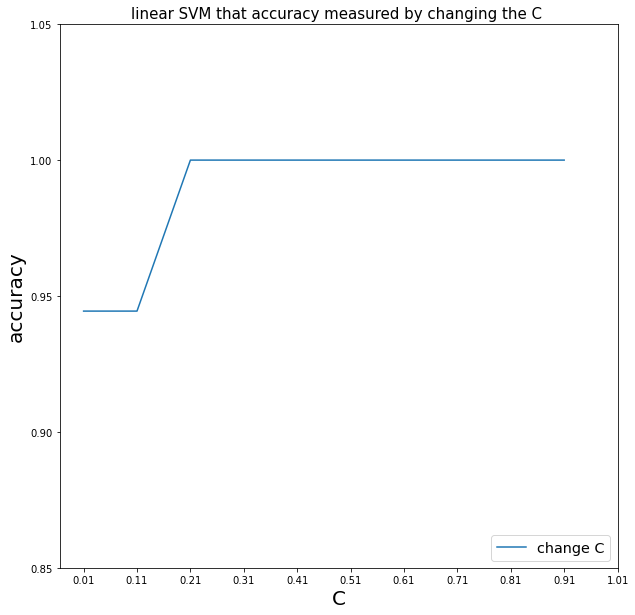

In [22]:
from sklearn import svm

# graph setting
plt.figure(figsize=(10.0,10.0))
plt.title('linear SVM that accuracy measured by changing the C ',fontsize='15')
plt.xlabel('C',fontsize='20')
plt.ylabel('accuracy',fontsize='20')

# 각 hyper parameter에서 나타나는 정확도를 성능지표로 삼기위해 리스트 생성
score = []

for c in np.arange(0.01, 1, step=0.1):
    ls = svm.SVC(kernel = 'linear' , C=c)
    ls.fit(x_train,y_train)
    y_pred = ls.predict(x_valid)
    score.append((y_valid==y_pred).mean())

plt.plot([i for i in np.arange(0.01,1,step=0.1)],score,label='change C')

# graph setting
plt.legend(loc='lower right',fontsize='x-large')
x_bins = np.arange(0.01,1.1,step=0.1)
plt.xticks(x_bins)
y_bins = np.arange(0.85,1.05,step=0.05)
plt.yticks(y_bins)
plt.show()

### 결과 : C >= 0.31 부터는 상당히 높은 정확도를 보인다.

### 2) 최종 성능 평가

In [23]:
# valid와 training으로 나눠져있던 데이터를 최종 성능 검증을 위한 training set으로 합친다.
x_train = np.concatenate((x_train, x_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

In [24]:
ls = svm.SVC(kernel = 'linear', C=1)
ls.fit(x_train,y_train)
y_pred = ls.predict(x_test)
ls_score = (y_test == y_pred).mean()
print("final score : %.2f 입니다."%ls_score)

final score : 1.00 입니다.


## 2. Kernel Trick

### 1) 여러가지 커널 트릭을 사용해보고 제일 좋은 것을 고른다. c는 0.11로 선택한다.

In [25]:
from sklearn.model_selection import train_test_split
# 80 : 20으로 데이터 분할
x_train, x_test, y_train, y_test, x_valid, y_valid =0, 0, 0, 0, 0, 0
x_train, x_test, y_train, y_test = train_test_split(wine_scaled_data, wine.target, test_size = 0.2,random_state=95)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5,random_state=95) 

In [26]:
from sklearn import svm

kernel_list = ['rbf', 'poly','sigmoid']

score = []
for k in kernel_list:
    ksv = svm.SVC(kernel = k, C=1)
    ksv.fit(x_train,y_train)
    y_pred = ksv.predict(x_valid)
    score.append((y_pred==y_valid).mean())
    
for kl, s in zip(kernel_list,score):
    print('kernel %s의 점수는 %.2f 입니다.'%(kl,s))

kernel rbf의 점수는 1.00 입니다.
kernel poly의 점수는 0.89 입니다.
kernel sigmoid의 점수는 0.94 입니다.


### 결과 : kernel trick 중 가장 좋은 것은 rbf 였다.

### 2) 최종 성능 평가

In [27]:
# valid와 training으로 나눠져있던 데이터를 최종 성능 검증을 위한 training set으로 합친다.
x_train = np.concatenate((x_train, x_valid), axis=0)
y_train = np.concatenate((y_train, y_valid), axis=0)

In [28]:
for k in ['rbf', 'poly', 'sigmoid']:
    ksv = svm.SVC(kernel = k, C=1)
    ksv.fit(x_train,y_train)
    y_pred = ksv.predict(x_test)
    score = (y_test == y_pred).mean()
    print("kernel %s의 final score는 %.2f입니다."%(k,score))

kernel rbf의 final score는 1.00입니다.
kernel poly의 final score는 0.89입니다.
kernel sigmoid의 final score는 1.00입니다.
